In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Normalization

import matplotlib.pyplot as plt


In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
for data in [X_train, y_train, X_test, y_test]:
    data = data/255

In [12]:
input_data = Input((28, 28), name='input')
x = Flatten()(input_data)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=input_data, outputs=outputs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 2s 34us/step - loss: 0.1137 - accuracy: 0.9658
Epoch 2/2
60000/60000 [==============================] - 2s 35us/step - loss: 0.1014 - accuracy: 0.9685


In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 22us/step


[0.12076442100927234, 0.9638000130653381]

6


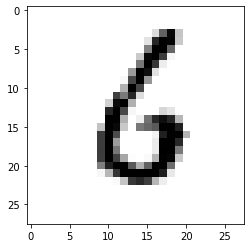

In [34]:
prediction = model.predict(X_test)[50]
print(np.argmax(prediction))
plt.imshow(X_test[50], cmap='binary')